## 3) 1D CNN으로 IMDB 리뷰 분류하기

In [1]:
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
(X_train,y_train),(X_test,y_test) = datasets.imdb.load_data(num_words=vocab_size)

In [3]:
max_len = 200
X_train = pad_sequences(X_train,maxlen=max_len)
X_test = pad_sequences(X_test,maxlen=max_len)

In [4]:
print(X_train.shape)
print(X_test.shape)

(25000, 200)
(25000, 200)


In [5]:
print(y_train[:5])

[1 0 0 1 0]


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [7]:
embedding_dim = 256
batch_size = 256

In [8]:
model = Sequential()
model.add(Embedding(vocab_size,256))
model.add(Dropout(.3))
model.add(Conv1D(256,3,padding = 'valid', activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(.5))
model.add(Dense(1,activation = 'sigmoid'))

In [9]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['acc'])
history = model.fit(X_train,y_train,epochs = 10, validation_data=(X_test,y_test),callbacks=[es,mc])

Epoch 1/10
  1/782 [..............................] - ETA: 0s - loss: 0.6853 - acc: 0.5625

## 1D CNN으로 스펨 메일 분류

In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv('spam.csv',encoding = 'latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data = data.iloc[:,:-3]

In [7]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])

In [8]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
len(data)

5572

In [9]:
data['v2'].nunique(),data['v1'].nunique()

(5169, 2)

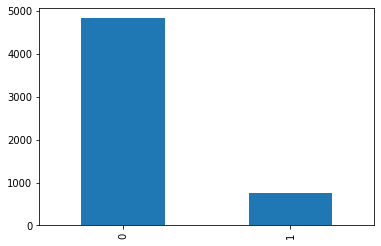

In [14]:
data.v1.value_counts().plot.bar()
plt.show()

In [15]:
data.drop_duplicates(subset=['v2'],inplace = True)

In [16]:
len(data)

5169

In [17]:
data.v2.nunique()

5169

In [18]:
X_data = data['v2']
y_data = data['v1']

In [19]:
vocab_size = 1000
tokenizer = Tokenizer(num_words = vocab_size)

tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)

메일의 최대 길이 : 172
메일의 평균 길이 : 12.566841


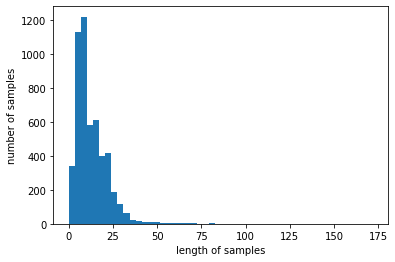

In [21]:
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [22]:
max_len = 172
data = pad_sequences(X_data,maxlen = max_len)

In [23]:
print(data.shape)

(5169, 172)


In [24]:
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('훈련 데이터의 개수 :',n_of_train)
print('테스트 데이터의 개수:',n_of_test)

훈련 데이터의 개수 : 4135
테스트 데이터의 개수: 1034


In [25]:
X_test = data[n_of_train:] #X_data 데이터 중에서 뒤의 1034개의 데이터만 저장
y_test = np.array(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1034개의 데이터만 저장
X_train = data[:n_of_train] #X_data 데이터 중에서 앞의 4135개의 데이터만 저장
y_train = np.array(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4135개의 데이터만 저장
print("훈련용 이메일 데이터의 크기(shape): ", X_train.shape)
print("테스트용 이메일 데이터의 크기(shape): ", X_test.shape)
print("훈련용 레이블의 크기(shape): ", y_train.shape)
print("테스트용 레이블의 크기(shape): ", y_test.shape)

훈련용 이메일 데이터의 크기(shape):  (4135, 172)
테스트용 이메일 데이터의 크기(shape):  (1034, 172)
훈련용 레이블의 크기(shape):  (4135,)
테스트용 레이블의 크기(shape):  (1034,)


In [26]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [30]:
model = Sequential()
model.add(Embedding(vocab_size,32))
model.add(Dropout(0.2))
model.add(Conv1D(32,5,strides = 1, padding = 'valid', activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [32]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 3)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [33]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['acc'])

In [34]:
history = model.fit(X_train,y_train, epochs=10, batch_size=64,validation_split=0.2, callbacks=[es,mc])

Epoch 1/10
52/52 [==============================] - ETA: 0s - loss: 0.4934 - acc: 0.8434
Epoch 00001: val_acc improved from -inf to 0.87304, saving model to best_model.h5
52/52 [==============================] - 1s 13ms/step - loss: 0.4934 - acc: 0.8434 - val_loss: 0.3847 - val_acc: 0.8730
Epoch 2/10
48/52 [==========================>...] - ETA: 0s - loss: 0.3770 - acc: 0.8695
Epoch 00002: val_acc did not improve from 0.87304
52/52 [==============================] - 1s 10ms/step - loss: 0.3734 - acc: 0.8697 - val_loss: 0.3337 - val_acc: 0.8730
Epoch 3/10
50/52 [===========================>..] - ETA: 0s - loss: 0.2115 - acc: 0.9150
Epoch 00003: val_acc improved from 0.87304 to 0.98186, saving model to best_model.h5
52/52 [==============================] - 1s 11ms/step - loss: 0.2083 - acc: 0.9169 - val_loss: 0.1089 - val_acc: 0.9819
Epoch 4/10
49/52 [===========================>..] - ETA: 0s - loss: 0.0707 - acc: 0.9799
Epoch 00004: val_acc did not improve from 0.98186
52/52 [==========

In [35]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

33/33 [==============================] - 0s 1ms/step - loss: 0.0692 - acc: 0.9787

 테스트 정확도: 0.9787


## Multi - Kernel 1D CNN으로 네이버 영화 리뷰 분류하기

In [36]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [37]:
train = pd.read_table('ratings_train.txt')
test = pd.read_table('ratings_test.txt')

In [40]:
len(train)

150000

In [39]:
train['document'].nunique()

146182

In [42]:
train.drop_duplicates(subset=['document'],inplace = True)

In [43]:
print(len(test))
print(test['document'].nunique())

50000
49157


In [44]:
test.drop_duplicates(subset=['document'],inplace = True)

In [48]:
train.isnull().values.any()

True

In [49]:
train.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [50]:
test.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [54]:
train.dropna(how='any',inplace = True)
test.dropna(how = 'any', inplace = True)

In [58]:
train['document'] = train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test['document'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")

In [62]:
train = train.loc[train['document'] != '']
test = test.loc[test['document'] != '']

In [64]:
train.reset_index(inplace = True)
del train['index']

test.reset_index(inplace = True)
del test['index']

In [66]:
len(test)

48852

In [67]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [68]:
okt = Okt()

In [70]:
X_train = []
for document in train['document'] :
    temp_X = []
    temp_X = okt.morphs(document,stem = True)
    temp_X = [word for word in temp_X if word not in stopwords]
    X_train.append(temp_X)

In [72]:
X_test = []
for sentence in test['document'] :
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [74]:
vocab_size = 19417

tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [75]:
y_train = np.array(train['label'])
y_test = np.array(test['label'])

In [76]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [77]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

145380
145380


In [78]:
max_len = 30
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [79]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [80]:
embedding_dim = 128
dropout_prob = (0.5,0.8)
num_filters = 128

In [81]:
model_input = Input(shape = (max_len,))
z = Embedding(vocab_size,embedding_dim,input_length = max_len, name = 'embedding')(model_input)
z = Dropout(dropout_prob[0])(z)

In [82]:
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv = Flatten()(conv)
    conv_blocks.append(conv)

In [84]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_prob[1])(z)
z = Dense(128, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [85]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 128)      2485376     input_1[0][0]                    
__________________________________________________________________________________________________
dropout_7 (Dropout)             (None, 30, 128)      0           embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 28, 128)      49280       dropout_7[0][0]                  
_______________________________________________________________________________________

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size = 64, epochs=10, validation_data = (X_test, y_test), verbose=2, callbacks=[es, mc])